Project 1 for CS135 Summer 2025

We need to build a classifier for handwritten digits and for 
discerning trouser from dresses using logistic regression.



# Part 1: 8s vs 9s from MNIST dataset

In part 1, we were tasked with building a classifier to tell the difference between handwritten 8 and 9 digits from the MNIST data set. Along the way, we explored how a number of hyperparameters affect classifier performance, namely: 
- a limit on the number of iterations the classifier can run for during training
- the strength of the regularization

We also spent time looking at examples in the data to see what characteristics that false positive and false negatives have which cause them to be misclassified. Furthermore, we looked at the coefficient weights which the classifier converged to and connected those numbers to the characteristics that lead to false classifications.

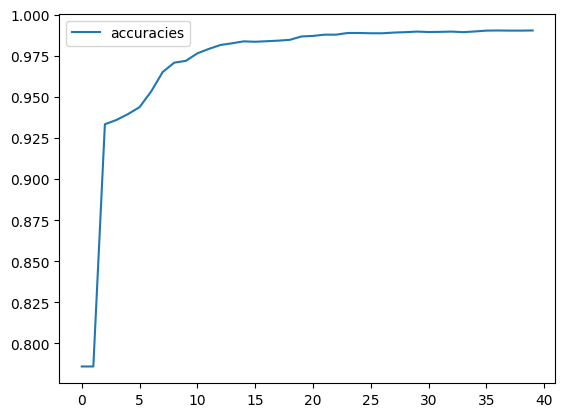

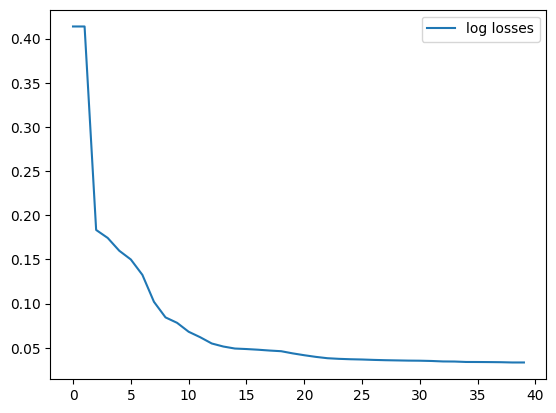

Here we plot accuracy and training log loss against max iterations. The graphs show that, as the accuracy of the model goes up, the log loss decreases, which behaves exactly as loss should behave if the problem is constructed correctly. The other thing that the graphs show is that more iterations leads to lower loss, which generally makes sense as well. More iterations means the solver can take more steps towards a better solution.

Text(0, 0.5, 'Coefficient weight of pixel 000')

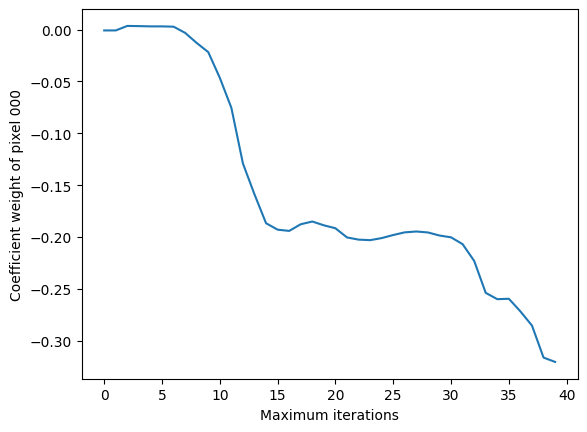

Here we plot the value of the coefficient at pixel 0 as max iterations increases. The graph shows that importance of pixel 0 grows as the solver is allowed to run for more iterations (importance being judged as the magnitude of the coefficient assigned to pixel 0). 

accuracy: 0.9662128088754413
--confusion matrix-- 
[[942  32]
 [ 35 974]]


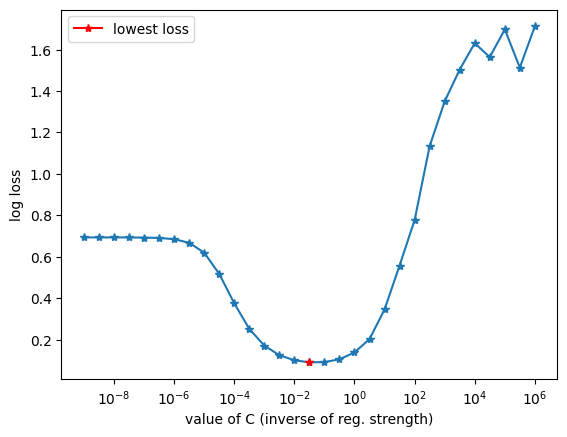

Here we plot the test log loss while varying the regularization strength. The best regularization value is C=0.0316 granting a loss of 0.0900 with an accuracy of 0.966. The confusion matrix supports the returned number for accuracy.

[  56  958  466   39  905  444  335  407 1490]
[1427  580  174  355 1327  290  998  401  440]
[ 137 1398   55  628  232 1827 1752  153 1431]
[1121 1979 1213 1297  272 1371 1175  953 1344]


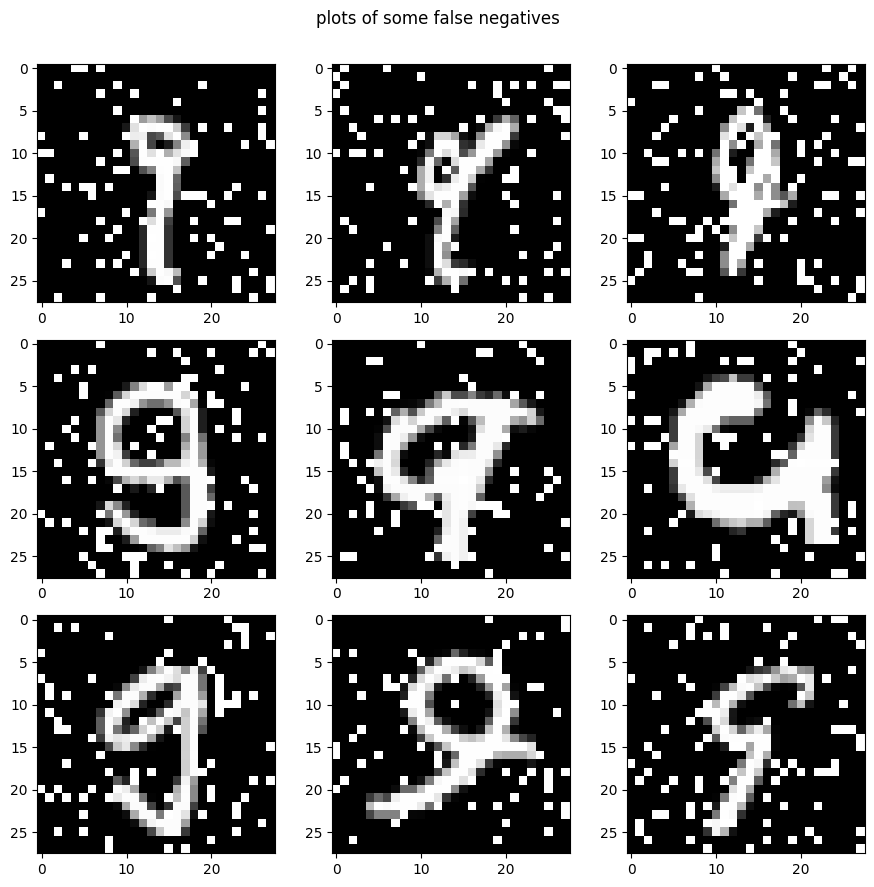

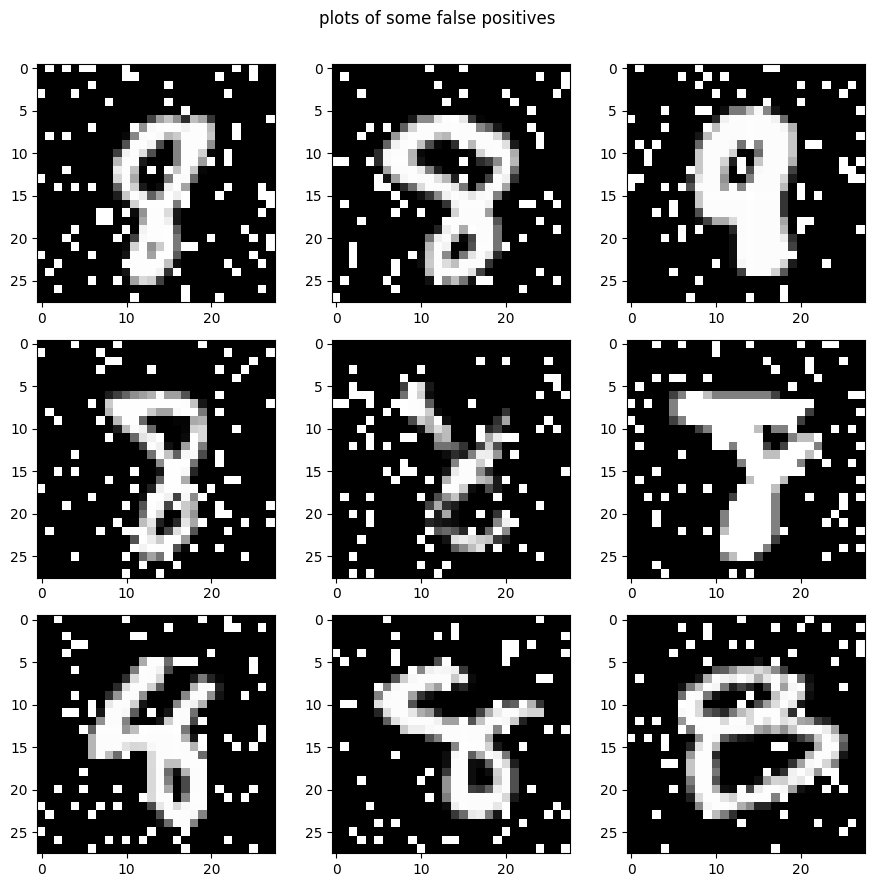

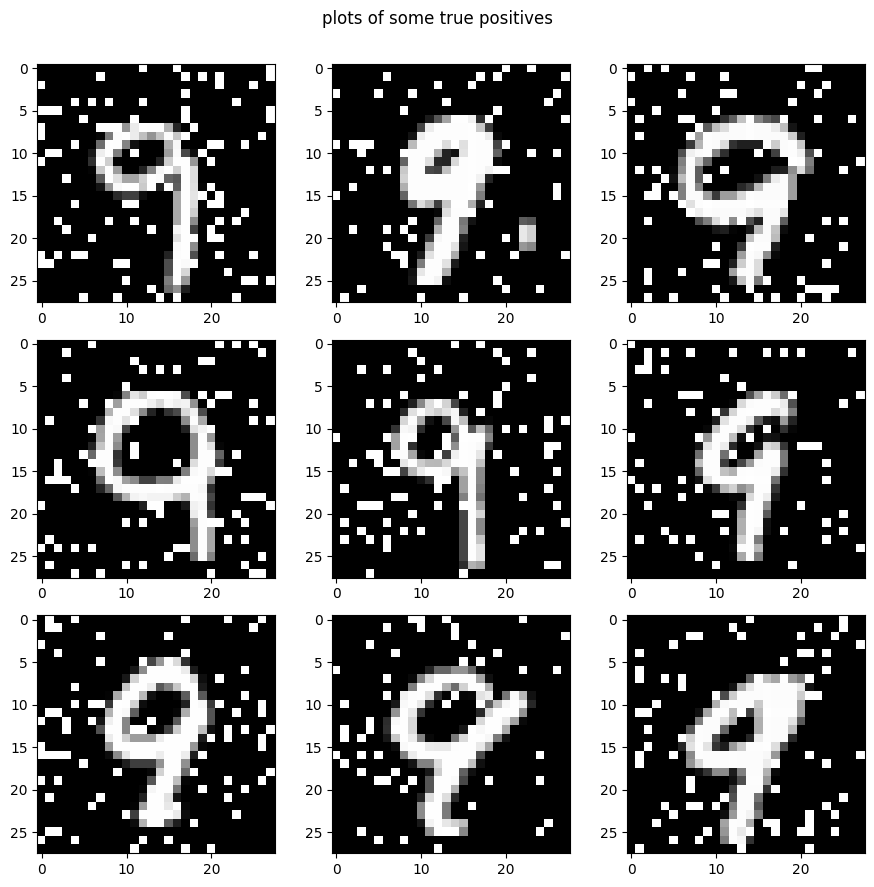

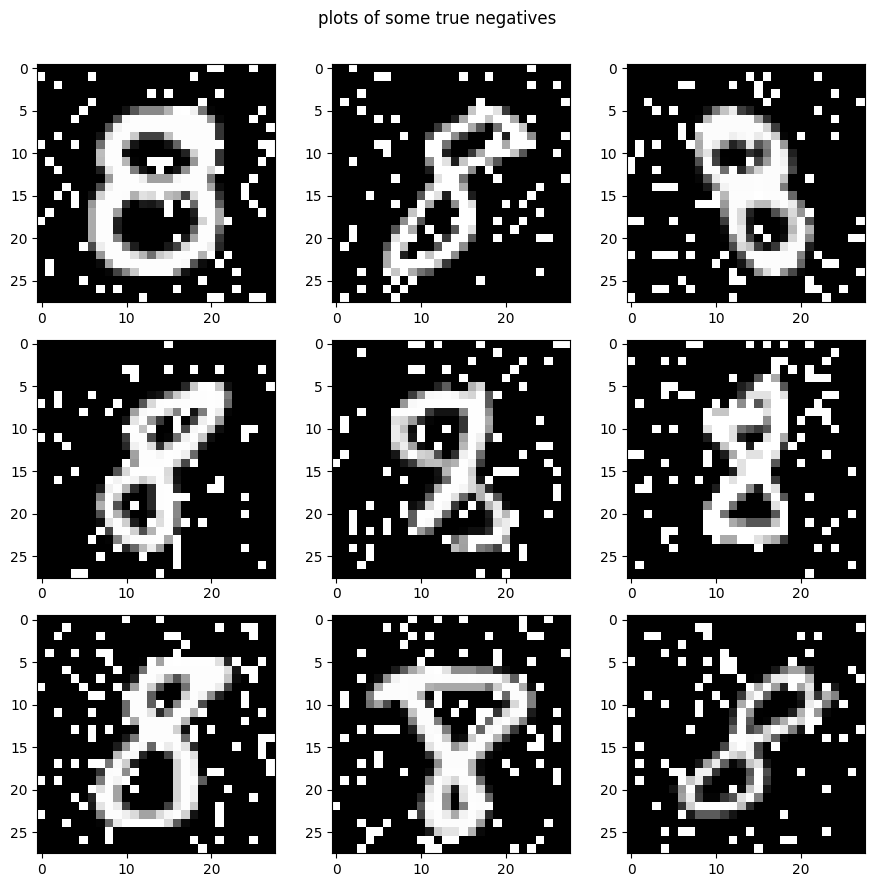

Here I plot samples of the data to get a sense of why some datapoints get misclassified. 

Generally, I think the algorithm is more likely to classify a 9 as a 9 when the 9 is written with a straight stem as opposed to a curled one. This makes sense, as curling the stem could confuse the classifier with the curlyness of an 8. 

8s get misclassified as a 9 when the the top lobe and bottom lobe balance resembles a 9. Generally, this means that the top lobe is larger than the bottom lobe and that the top lobe extend further out to the left than the bottom lobe does. In some cases, the bottom lobe is written so tightly that it almost looks like a straight line

Text(0.5, 1.0, "Colormap of classifier's weights")

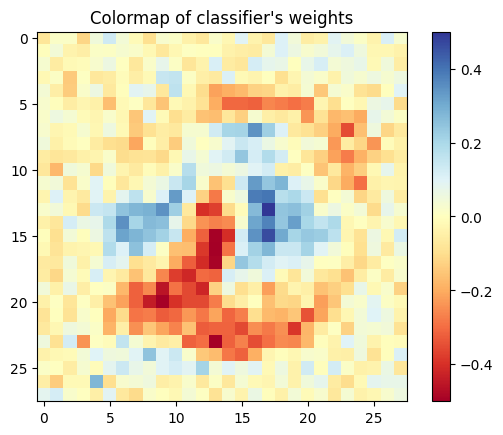

Here I plot the coefficients that the classifier converged to after training.

There are a large swath of negative coefficients towards the bottom left and top right of the image. The bottom left section makes a lot of sense because generally, a 9 will leave that area empty, whereas an 8 will fill that area. the top right having a decent amount of red pixels is interesting because this might reflect a fact about how people generally initiate the writing of the number 8 vs the number 9. I can imagine the dataset including mostly 9s which were written with the top side of the lobe curving up, whereas 8s might be written with the top side of the top lobe slanting downward from northeast to southwest.

The pixels that the classifier decided on blue may reflect general hotspots where 9 will take room but 8 won't. notice in the plots of accurately classified numbers that the thinnest part of the 8 is often on the same latitude as the thickest part of the 9. the graph suggests that checking for thinness in this area is core to how the classifier decides between an 8 and a 9. 

The coefficient map explains some of the inaccurate classifications. based on this classifier, a 9 where the stem is curled up will resemble an 8 because the curled stem takes up space in the area that 9s usually leave empty. a 9 that is tilted or not completely centered is also at risk of not passing the thickness check in the center of the map. for false positive cases, we also see some instances of 8s which pass as 9s due to lopsidedness making the 8 fail the thickness check or the empty bottom left space check.

# Part 2: Trousers vs. Dresses in Fashion MNIST

best C: 31.622776601683793


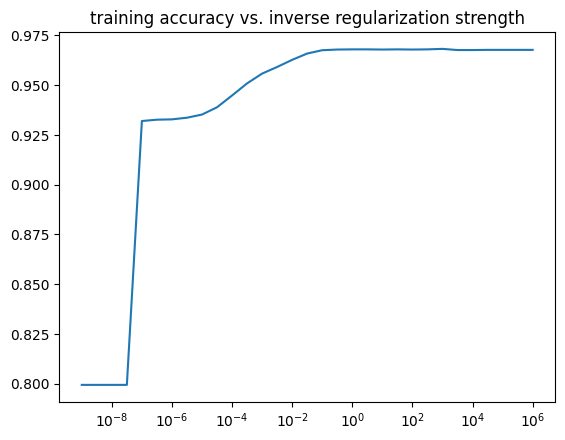

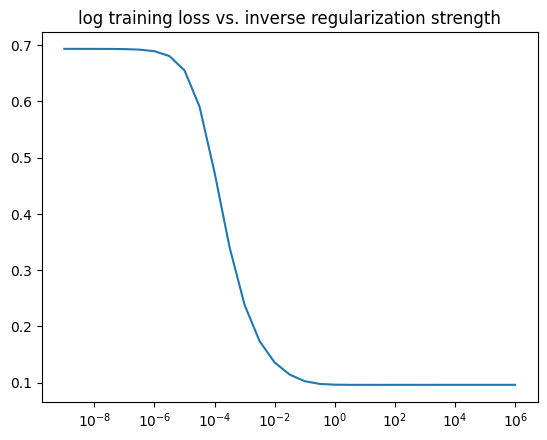

Here I vary regularization strength and plot how accuracy and training log loss changes.

Training loss goes down as C increases (regularization strength decreases). This suggests that every pixel is necessary for making a determination between trouser and dress. This makes sense, as clothing takes up a lot of image area, whereas handwritten digits do not.

1001 [0]
num_nonzero: 346
1003 [1]
num_nonzero: 289


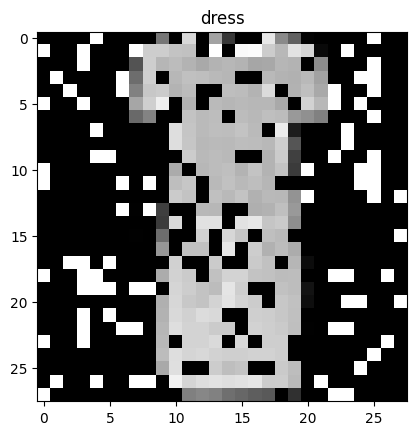

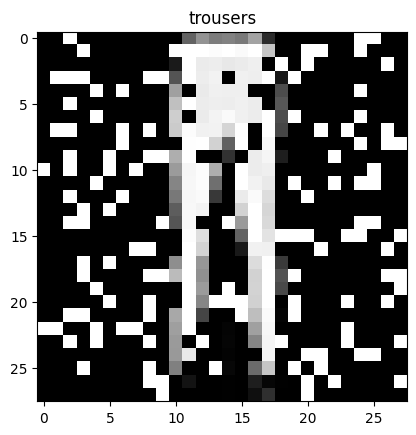

Here I plot an example of a dress and an example of a trouser

From a quick glance, a dress might take up more pixels than a pair of trousers. A feature to add could be the number of non-zero pixel values. a higher nonzero pixel count would denote a dress

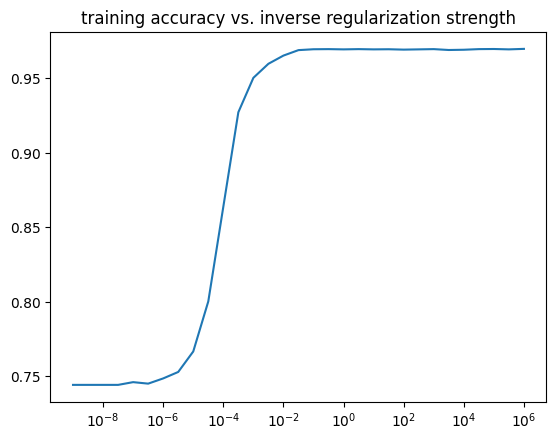

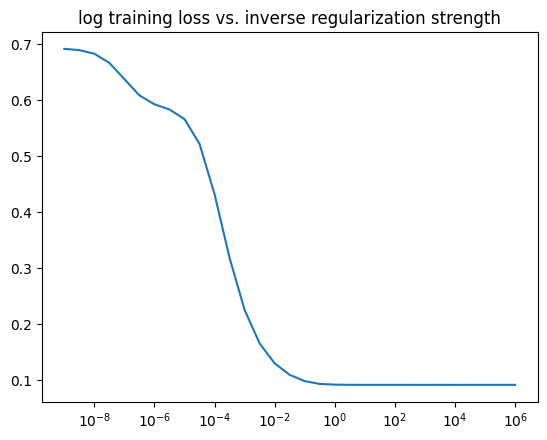

Here I add the nonzero pixel count feature and make a plot of training accuracy and log loss while varying regularization  strength.

Adding just the one feature of nonzero pixel count helps with training accuracy for highly regularized classifiers. That benefit goes away as regularization strength dies down (it would appear that the change it brings is very slightly negative). 

Another pixel intensity-counting feature I could try could be counting the pixels in a center column with a particular width (motivated by the fact that trousers seem to take up less width than dresses). 

In lieu of an ad hoc decision on an area of the image to count non-zero pixels, I am also curious about creating a feature based on the outline of the article of clothing.

The Sobel operator is a simple way to find the gradient at every point in an image. It works by convolving the original image with a kernel to produce an alternate image. The kernel is a 3x3 matrix with values chosen to detect rapid transitions in pixel intensity, which is akin to a derivative, in a 3x3 area. The operator has variants for the x and y direction, and the x and y variants can even be combined via the Pythagorean theorem. The latter is what I will try to attempt here. 

To clarify: I would like to use the combined Sobel operator to get image containing the outline of the clothing. I'll add this entire image as features to the original feature matrix. This doubles the number of features I have. 

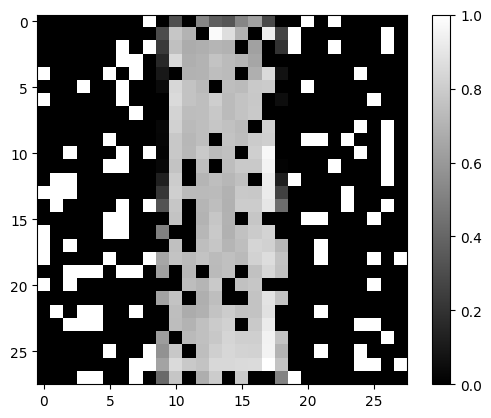

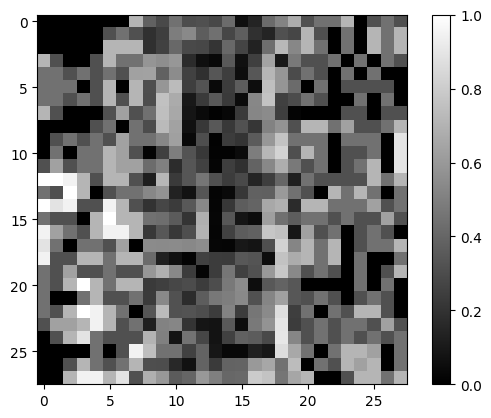

An example of what an image and its sobelized image would look like. Honestly, the sobelized map looks terrible. I'm curious to see how it functions as a transformed feature though, despite the image beingn illegible.

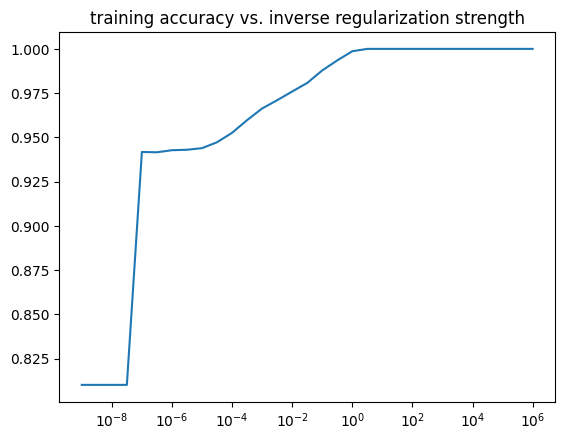

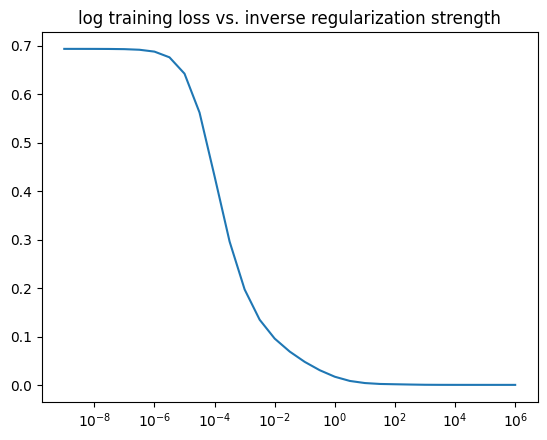

We're back to training accuracy and log loss plots. Looks pretty effective at C=1 or greater. Smells a little of overfitting tho... we'll have to see how it works on the test set

In [16]:
best_C

np.float64(1000000.0)

best C value is the one that corresponds to the minimum regularization strength? so maybe 0 regularization is best

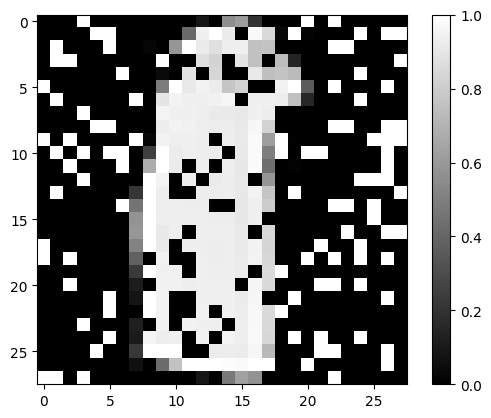

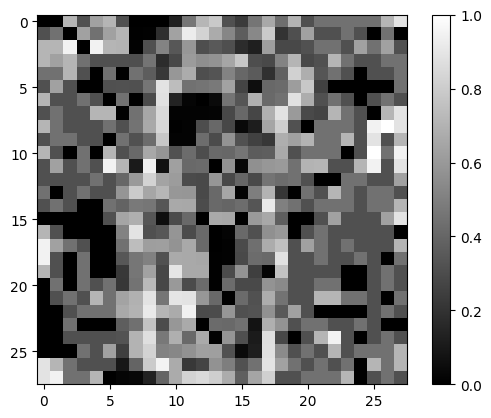

well, the test error of the model trained on sobelized images has an error rate of 6%, which is better than the first error rate that i got (which was 6.8%). let's take a look at the color map of the coefficients

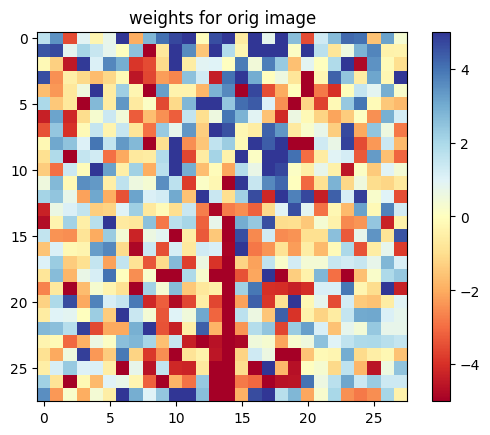

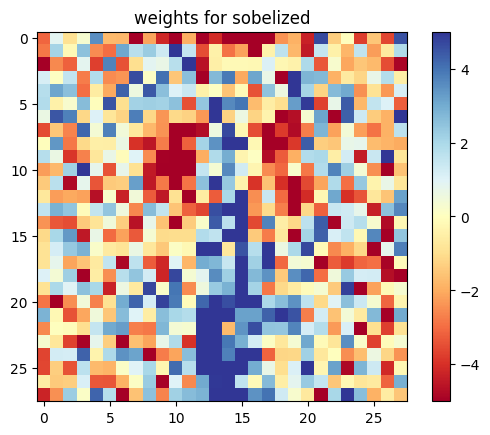

it's kinda cool: both sets of coefficient weights seem to place high importance on the bottom side of the columns near the middle. likely this is checking the split in the fabric due to trousers having two columns. other areas with large importance seem to be the armpit area for the dress and the top of the piece of clothing. all of these generally concern the silhouette of the article of clothing.

due to the salt and pepper noise in the training data, i'm very curious to see how a median filter would work to remove that noise. and i wonder if a median filtered image would be easier for the logistic regression to classify trousers and dresses 

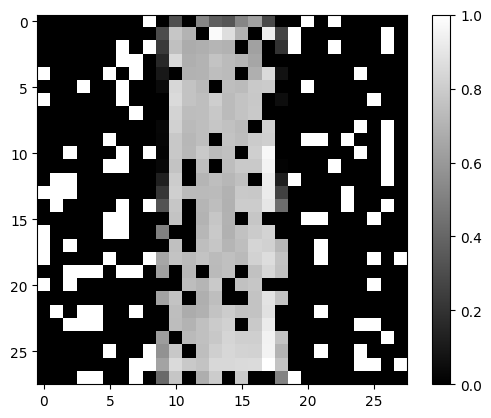

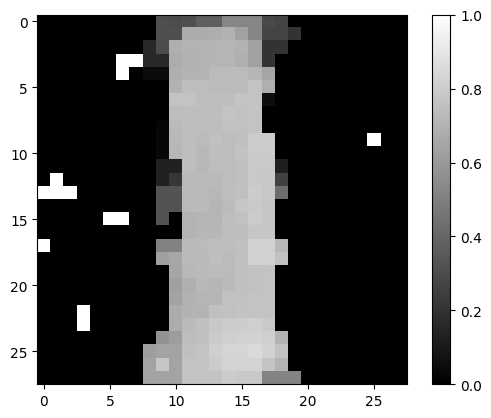

ok that worked kind of really well. the only thing i'm worried about is if it removes the black pixels from the trouser pants split, or the black pixels from the dress underarms. oh well, we should just try it now 

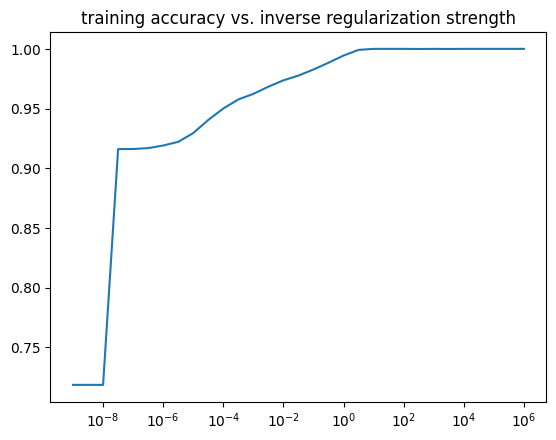

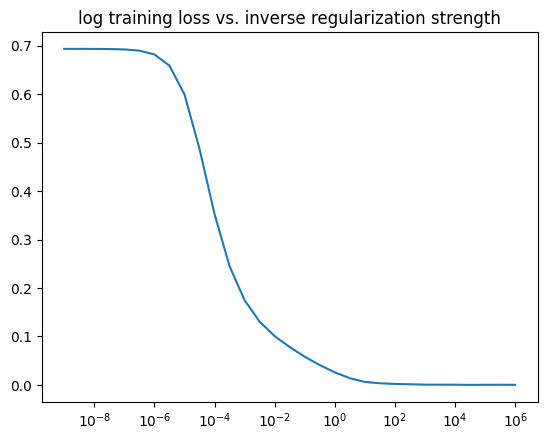

similar behavior to the sobelized images, tho the training loss peaks at a lower regularization strength

In [22]:
best_C

np.float64(31622.776601683792)

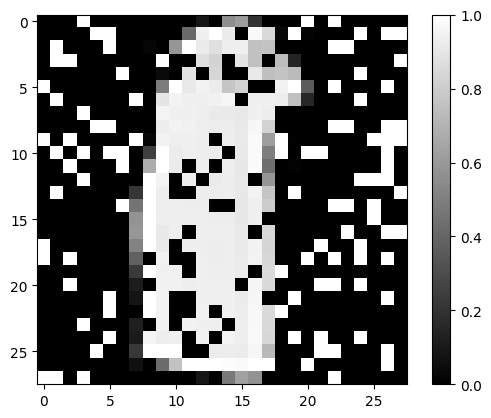

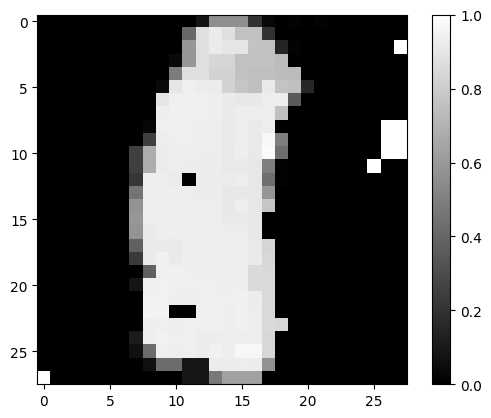

median filter gives me an improvement of 0.05% over sobel. not much gains. but still better than the baseline performance

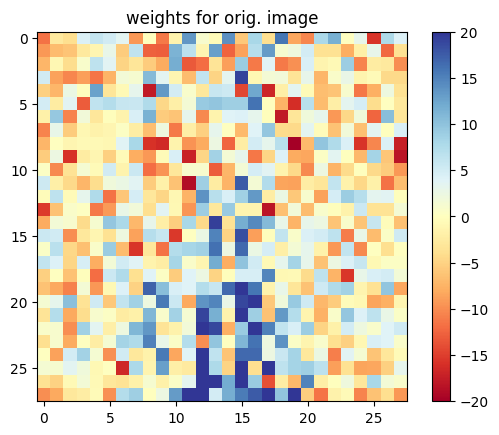

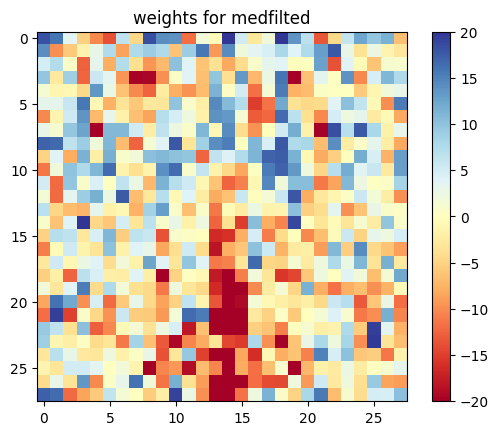

from the coefficient weiights, the classifier is generally still looking in the same areas


now i'll try to put the two kernel-filtered feature ideas together

i get an error rate of 4.65%. significant improvement from either of the two filters by themselves! it's honestly rather exciting. 

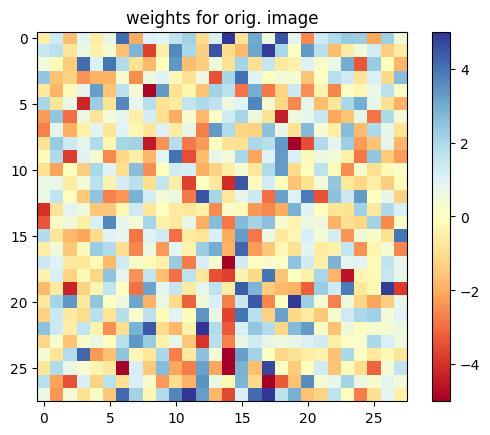

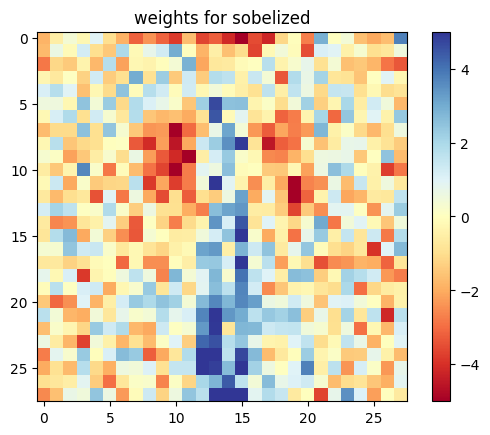

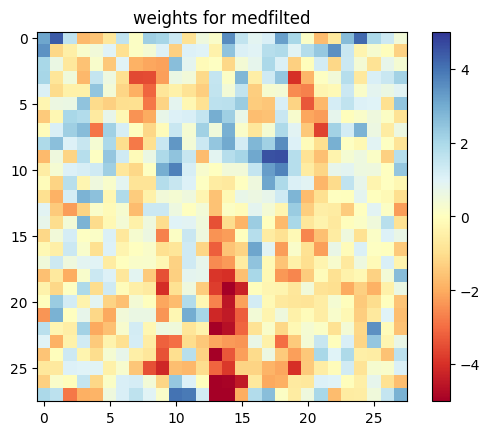

it looks like the features that the classifier used to look for in a single image are now split up into two images. this might have meaningful benefit.
since the sobelized and median-filtered images each offer an alternate view of the same object, it's possible that one feature presents itself better in one view vs. the other. it's as if one features has a higher SNR in one view than the other. in any case, it's cool that throwing more data augmentations at the classifier is helpful.

It's bothering me that the "best C" is one that is basically no regularization. I think this will lead to overfitting.
Since the training loss curve showed that C=1 still yielded basically 0 training loss, I would like to try that value for C
instead of 31k so that I enforce at least some kind of regularization.

Since both the sobel and median filter-based features improve baseline performance, I figured why not add both? Maybe the performance will be even better.  

I get an error rate of 4.15%. Marked improvement from C=31k! I believe this is proof for my hunch that a little regularization helped with overfitting. I do not have time to test other values of C. But I believe I made a good choice for C based on the training loss curve I saw. If I had time to test more values of C, I would try those values for which the training loss is a little worse 

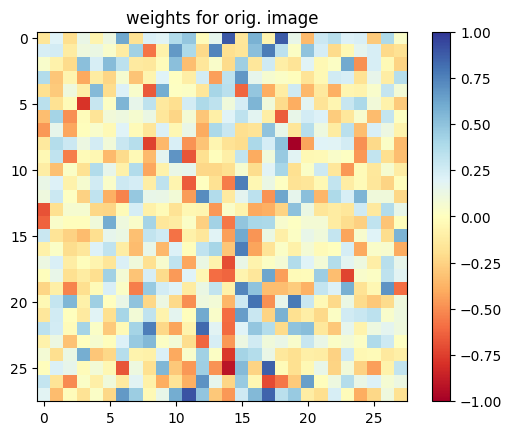

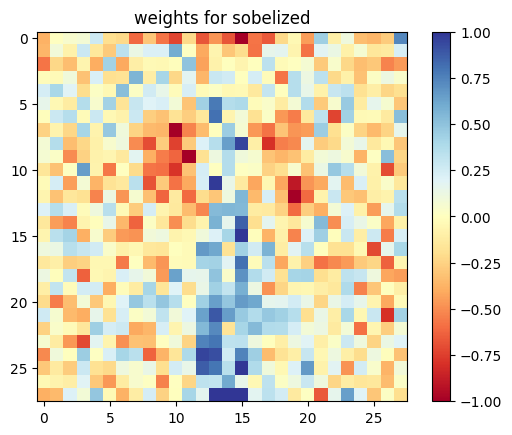

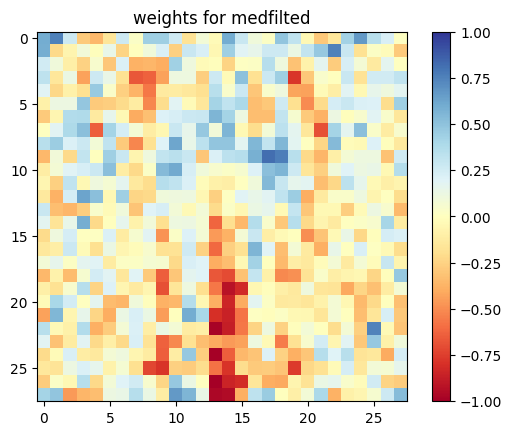

Visually hard to tell the difference between coefficients when C=31k and C=1k. biggest difference is the dynamic range of the coefficients. that appears to be the work of the L2 penalty in decreasing the overall magnitude of the coefficient vector. the test error rate speaks for itself though. I do believe the regularization to avoid overfitting explains the improvement in performance